In [2]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['C:\\Users\\user\\PycharmProjects\\Open_Close_GNN'])

Python 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)] on win32


In [3]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
from seaborn import heatmap

# Подготовка данных

In [4]:
close = loadmat(f'../data/new/raw/resultsROI_Condition001.mat')['Z']
opend  = loadmat(f'../data/new/raw/resultsROI_Condition002.mat')['Z']

for i in range(84):
    np.fill_diagonal(close[:, :, i], 0)
    np.fill_diagonal(opend[:, :, i], 0)

<AxesSubplot:>

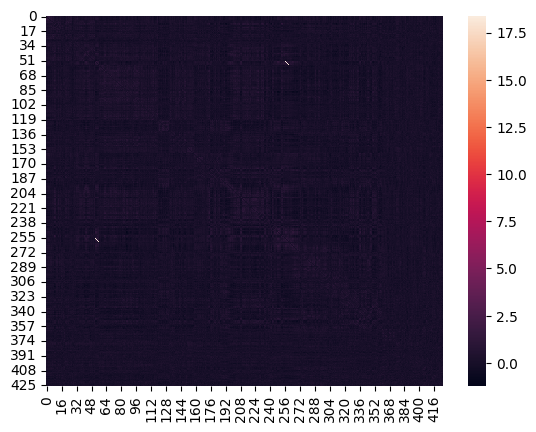

In [7]:
heatmap(close[:, :, 3])

In [5]:

dl = np.array([52, 53, 54, 55])
#dl = np.array([52, 256, 53, 257, 54, 258, 55, 259])
close_ = np.zeros((84, 422, 422))
open_ = np.zeros((84, 422, 422))

for i in range(84):
    ts = np.delete(close[:, :, i], dl, 0)
    close_[i] = np.delete(ts, dl, 1)
    ts = np.delete(opend[:, :, i], dl, 0)
    open_[i] = np.delete(ts, dl, 1)
    


In [6]:
for i in range(426):
    for t in range(426):
        if opend[i, t, 9] > 10:
            print(i, t)

52 256
53 257
54 258
55 259
256 52
257 53
258 54
259 55


<AxesSubplot:>

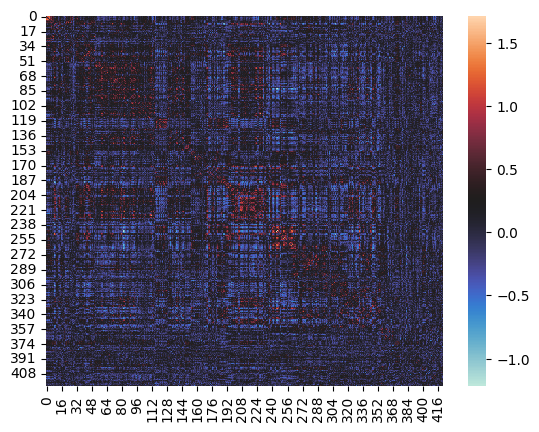

In [6]:
heatmap(close_[3], cmap='icefire')

<AxesSubplot:>

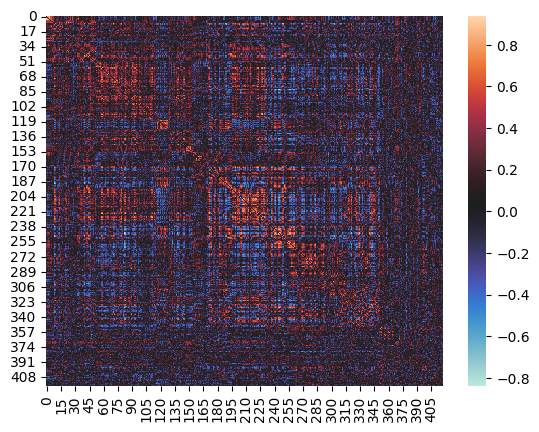

In [10]:
heatmap(np.tanh(close_[3]), cmap='icefire')

# Модель

In [5]:
open_close = np.concatenate([open_, close_])
labels = [1] * 84 + [0] * 84

In [17]:
pca = PCA(n_components=100)

pca.fit(open_close.reshape((168, -1)))
transformed = pca.transform(open_close.reshape((168, -1)))
transformed.shape

(168, 100)

In [15]:
sum(pca.explained_variance_ratio_)

0.7314622116207129

In [26]:
pca.explained_variance_ratio_

array([0.02105909, 0.02004045, 0.01615417, 0.01497628, 0.01362283,
       0.01328664, 0.01273433, 0.01262562, 0.01218681, 0.01165034,
       0.01082663, 0.01052115, 0.01030341, 0.01010781, 0.00971371,
       0.00952444, 0.00938255, 0.00922728, 0.00897729, 0.00890511,
       0.00868787, 0.00850924, 0.00839432, 0.00833351, 0.00822335,
       0.0081825 , 0.00804549, 0.00777024, 0.00775516, 0.0076832 ,
       0.00761297, 0.00754691, 0.00752434, 0.00737745, 0.00731418,
       0.00722989, 0.00717296, 0.00710998, 0.00700813, 0.00700766,
       0.00694997, 0.00684158, 0.00674387, 0.00672072, 0.00665335,
       0.00663623, 0.0065473 , 0.00649801, 0.00644282, 0.00641618,
       0.00630487, 0.00626143, 0.00625961, 0.00621911, 0.00610449,
       0.00610045, 0.00598512, 0.00595718, 0.00593954, 0.00588954,
       0.00585044, 0.00582695, 0.00578307, 0.00573015, 0.00567014,
       0.00566621, 0.00560922, 0.00559862, 0.00556324, 0.00552585,
       0.00550078, 0.00544225, 0.0053885 , 0.00537138, 0.00533

In [15]:
pca.components_.shape

(152, 174724)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(transformed, labels)

In [25]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred = lg.predict(x_test)
lg.score(x_test, y_test)


0.8333333333333334

In [12]:
len(y_train)

126

In [16]:
4/21

0.19047619047619047

In [11]:
sum(y_test)
len(y_test)

42

In [38]:
cf = np.zeros((500, 2, 2))
for i in range(500):
    #print(i)
    x_train, x_test, y_train, y_test = train_test_split(transformed, labels)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    cf[i] = confusion_matrix(y_test, pred)


c:\ProgramData\Anaconda3\envs\Open_Close_GNN\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\ProgramData\Anaconda3\envs\Open_Close_GNN\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

In [39]:
np.mean(cf[:, 1, 0])

5.13

In [40]:
np.mean(cf[:, 0, 1])

5.532

(array([ 1., 14., 36.,  0., 53., 72., 77.,  0., 82., 64., 54.,  0., 20.,
        14.,  6.,  0.,  4.,  1.,  1.,  1.]),
 array([ 0.  ,  0.75,  1.5 ,  2.25,  3.  ,  3.75,  4.5 ,  5.25,  6.  ,
         6.75,  7.5 ,  8.25,  9.  ,  9.75, 10.5 , 11.25, 12.  , 12.75,
        13.5 , 14.25, 15.  ]),
 <BarContainer object of 20 artists>)

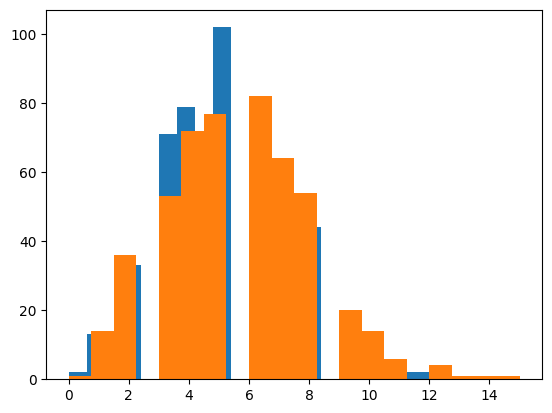

In [42]:
import matplotlib.pyplot as plt
plt.hist(cf[:, 1, 0], bins=20)
plt.hist(cf[:, 0, 1], bins=20)

In [28]:
confusion_matrix(y_test, pred)

array([[16,  5],
       [ 2, 19]], dtype=int64)

In [24]:
lg.coef_[0]

array([-0.18294873,  0.26015392, -0.30487456, -0.14134629, -0.05869678,
       -0.14224014, -0.32908108, -0.1362438 , -0.11078205,  0.10970082,
       -0.14385825, -0.107236  ,  0.01026099,  0.02545876, -0.01049365,
       -0.01865806, -0.01032107, -0.0243934 , -0.01766883, -0.09906608,
        0.07022288, -0.00583934, -0.29155209,  0.04183301,  0.1456015 ,
        0.04494059,  0.08326982,  0.06331795,  0.08597701, -0.15820814,
       -0.0444162 ,  0.09584467,  0.02441736,  0.04034378, -0.02311452,
       -0.01465157, -0.04295762,  0.01868385, -0.01054206,  0.05495006,
        0.25266545, -0.1118783 ,  0.07823952,  0.09913136, -0.04123847,
       -0.0341925 , -0.06685148,  0.01238346, -0.11404864, -0.10056345,
       -0.14046935, -0.05982782,  0.03459019,  0.0146747 , -0.10219829,
        0.03788116, -0.23587137,  0.06884128, -0.08523721,  0.00232168,
       -0.01839574,  0.10197092, -0.05919956,  0.14201631,  0.01618187,
       -0.13574719,  0.03043461,  0.05829974, -0.01265365, -0.00

In [28]:
print(np.std(x_train, 0)*lg.coef_)

[[-1.75790217  4.09005383 -2.70839285 -0.47572191 -0.51503538 -2.93246115
  -3.43045486 -0.82094461 -2.08816743  0.92483333 -1.26140094 -0.50790679
  -0.39340225  0.09954862 -0.08617644 -0.71185225 -0.69867624 -0.28695523
  -0.37187109 -0.65719998  0.23707693  0.12255679 -2.45890939  0.49941373
  -0.90166378 -0.03240274  0.30847431 -0.08586566  0.75730789 -0.43751995
   0.30391405  1.00130789  0.44613513  0.70626761  0.86181368 -0.88741814
  -0.53360178  0.68314078  0.34971957 -0.08744218  1.68061485 -0.51757354
  -0.92063425 -0.27729744 -0.7119311   0.01645755 -0.86831688 -1.28858105
   0.09908003 -1.21457457  0.34240991  0.2055001   0.03382401  0.60290435
  -0.71759906  0.93613284 -0.7014563  -0.08637195 -0.0761895   0.5333284
   0.78718895 -0.1340239  -0.13496368  0.59397249 -0.75647016 -0.47747926
   0.54593566  0.6109567  -0.18360785 -0.67927533 -0.10953331  1.1393083
  -1.75942462  0.97426949  0.3272255   0.04149547  0.33621506  1.17511488
   0.03116439  0.36417638  0.68764134 -0

In [40]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lg, x_train, y_train, cv=10)

In [41]:
cv_results['test_score']

array([0.84615385, 0.69230769, 0.84615385, 0.53846154, 0.84615385,
       0.76923077, 0.91666667, 0.91666667, 0.83333333, 0.75      ])

In [42]:
np.mean(cv_results['test_score'])

0.7955128205128206

In [46]:
from scipy.stats import ttest_1samp

t_stat, p_val = ttest_1samp(open_ - close_, 0)

<AxesSubplot:>

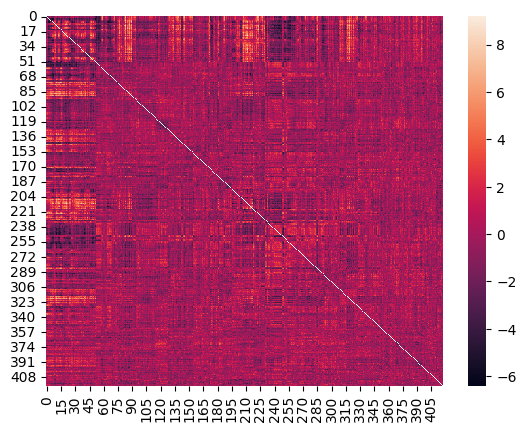

In [48]:
heatmap(t_stat)

<AxesSubplot:>

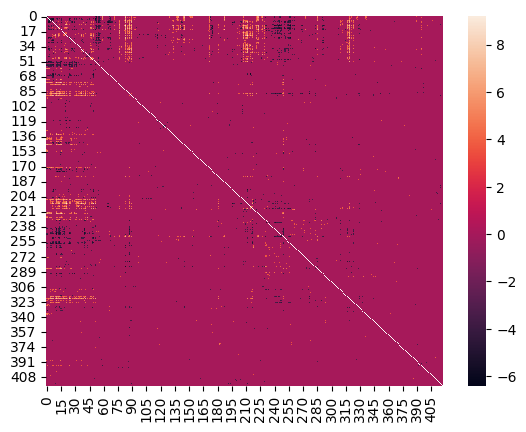

In [59]:
heatmap(t_stat * (p_val < 0.001))

<AxesSubplot:>

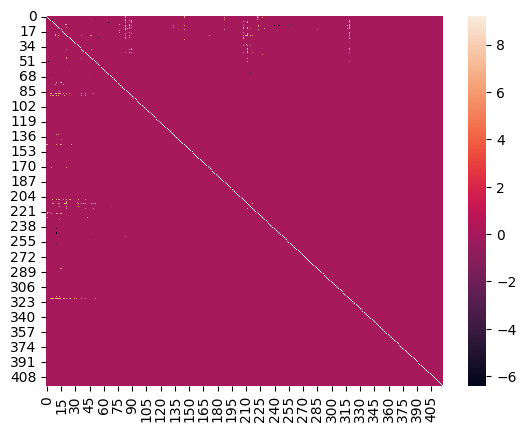

In [58]:
heatmap(t_stat * (p_val < alphacSidak))

In [54]:
from statsmodels.stats.multitest import fdrcorrection

fdrcorrection(p_val.reshape(-1), 0.025)


(array([False,  True, False, ..., False, False, False]),
 array([nan, nan, nan, ..., nan, nan, nan]))

In [55]:
from statsmodels.stats.multitest import multipletests
_, _, alphacSidak, _ = multipletests(p_val.reshape(-1), 0.025)

In [56]:
alphacSidak

1.449017087429283e-07